In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format


# Un primer analisis de los DF

## Installs

In [132]:
installs = pd.read_csv('TP 1er Cuatrimestre 2019/installs.csv', low_memory=False, parse_dates = ['created'], index_col=['created'])
installs = installs.reset_index()
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-04-24 06:23:29.495,1,1494519392962156891,4716708407362582887,NaN,False,True,6287817205707153877,nan,"373,912,712,647,216,320.00",adjust.com,NaN,79837499-2f2a-4605-a663-e322f759424f,app_open,NaN,NaN,4243443387795468703,"3,301,377,775,977,699,840.00"
1,2019-04-24 02:06:01.032,1,1494519392962156891,7143568733100935872,NaN,False,False,6287817205707153877,nan,"7,805,538,927,598,770,176.00",adjust.com,NaN,NaN,NaN,NaN,NaN,4724288679627032761,"3,301,377,775,977,699,840.00"
2,2019-04-20 10:15:36.274,1,1494519392962156891,5230323462636548010,NaN,False,True,6287817205707153877,nan,"8,355,495,513,718,673,408.00",adjust.com,NaN,dda99e3c-9c4b-487d-891c-79f0a02cb4a8,app_open,NaN,NaN,8291809486355890410,"4,060,929,664,968,129,024.00"
3,2019-04-20 21:56:47.151,1,1494519392962156891,5097163995161606833,NaN,False,True,6287817205707153877,nan,"2,355,772,091,376,915,456.00",adjust.com,NaN,7010c3ce-0fcf-46c6-9be8-374cc0e20af4,app_open,NaN,NaN,4006811922873399949,"3,301,377,775,977,699,840.00"
4,2019-04-20 22:40:41.239,1,1494519392962156891,6328027616411983332,NaN,False,False,6287817205707153877,nan,"6,156,971,151,807,134,720.00",adjust.com,NaN,NaN,NaN,NaN,NaN,3386455054590810771,"3,301,377,775,977,699,840.00"


In [30]:
installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481511 entries, 0 to 481510
Data columns (total 18 columns):
created               481511 non-null datetime64[ns]
application_id        481511 non-null int64
ref_type              481511 non-null int64
ref_hash              481511 non-null int64
click_hash            1142 non-null object
attributed            481511 non-null bool
implicit              481511 non-null bool
device_countrycode    481511 non-null int64
device_brand          276443 non-null float64
device_model          454619 non-null float64
session_user_agent    466672 non-null object
user_agent            330768 non-null object
event_uuid            103168 non-null object
kind                  103168 non-null object
wifi                  294829 non-null object
trans_id              8933 non-null object
ip_address            481511 non-null int64
device_language       453934 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(3), int64(5), object(7)
memory usage:

## Propongo categorias para las columnas

### A partir de analisis que se hacen despues

In [133]:
marcas = list(installs['device_brand'].drop_duplicates())

def categorizarDeviceBrand(x):
    return marcas.index(x) if (x != -1) else x

installs['device_brand'] = installs['device_brand'].fillna(-1).apply(categorizarDeviceBrand)

In [134]:
device_model = list(installs['device_model'].drop_duplicates())

def categorizarDeviceModel(x):
    return device_model.index(x) if (x != -1) else x

installs['device_model'] = installs['device_model'].fillna(-1).apply(categorizarDeviceModel)

In [135]:
device_language = list(installs['device_language'].drop_duplicates())

def categorizarDeviceLanguage(x):
    return device_language.index(x) if (x != -1) else x

installs['device_language'] = installs['device_language'].fillna(-1).apply(categorizarDeviceLanguage)


In [136]:
installs.describe()

,application_id,ref_type,ref_hash,device_countrycode,device_brand,device_model,ip_address,device_language
count,"481,511.00","481,511.00","481,511.00","481,511.00","481,511.00","481,511.00","481,511.00","481,511.00"
mean,114.63,"1,823,409,079,061,993,216.00","4,608,269,779,645,260,288.00","6,287,817,205,671,257,088.00",10.11,452.06,"4,600,401,451,357,956,096.00",18.37
std,79.54,"149,664,427,496,513,792.00","2,664,214,826,414,413,824.00","35,896,357.27",48.00,904.36,"2,668,896,755,869,744,128.00",19.44
min,1.00,"1,494,519,392,962,156,800.00","40,621,409,780,134.00","6,287,817,205,707,153,408.00",-1.00,-1.00,"33,114,277,486,038.00",-1.00
25%,36.00,"1,891,515,180,541,284,352.00","2,302,034,075,654,886,656.00","6,287,817,205,707,153,408.00",-1.00,81.00,"2,285,331,530,900,604,416.00",0.00
50%,121.00,"1,891,515,180,541,284,352.00","4,605,906,598,492,731,392.00","6,287,817,205,707,153,408.00",1.00,191.00,"4,582,320,595,070,138,880.00",33.00
75%,155.00,"1,891,515,180,541,284,352.00","6,914,483,780,916,173,824.00","6,287,817,205,707,153,408.00",6.00,350.00,"6,906,963,104,056,018,944.00",34.00
max,360.00,"1,891,515,180,541,284,352.00","9,223,365,873,867,066,368.00","6,287,817,205,707,153,408.00","1,084.00","6,472.00","9,223,362,640,454,048,768.00",223.00


# Analisis de Installs

In [24]:
installs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 481511 entries, 2019-04-24 06:23:29.495000 to 2019-04-22 01:35:10.887000
Data columns (total 19 columns):
application_id        481511 non-null int64
ref_type              481511 non-null int64
ref_hash              481511 non-null int64
click_hash            1142 non-null object
attributed            481511 non-null bool
implicit              481511 non-null bool
device_countrycode    481511 non-null int64
device_brand          481511 non-null float64
device_model          481511 non-null float64
session_user_agent    466672 non-null object
user_agent            330768 non-null object
event_uuid            103168 non-null object
kind                  103168 non-null object
wifi                  294829 non-null object
trans_id              8933 non-null object
ip_address            481511 non-null int64
device_language       481511 non-null float64
appGeneralizado       481511 non-null object
TopApp/Otro           481511 non-null obj

## Que apps aparecen?

In [63]:
app = installs['application_id'].value_counts().head(15)
app_log= np.log(app+1)
app_log

121                  11.18
36                   11.07
210                  10.42
14                   10.15
65                   10.05
68                    9.84
122                   9.63
155                   9.52
226                   9.51
21                    9.41
128                   9.40
70                    9.35
75                    9.25
133                   9.03
94                    8.96
Name: application_id, dtype: float64

Text(0,0.5,'App')

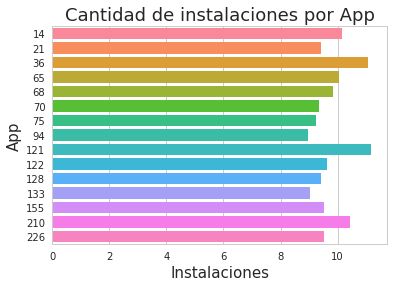

In [64]:
'''
Grafico de barras de aparicion de apps.
'''

g = sns.barplot(x=app_log.values, y=app_log.index, orient='h', saturation = 2)
g.set_title("Cantidad de instalaciones por App", fontsize=18)
g.set_xlabel("Instalaciones", fontsize=15)
g.set_ylabel("App", fontsize=15)

Hay una clara diferencia entre las aplicaciones 7 y 9 respecto de las demas.
Veamos cuanto abarcan realmente:

In [137]:
def top5Apps(app):
    if (app == 121 or app == 36 or app == 210 or app == 14 or app == 65):
        return app
    return 'Otro'

In [138]:
installs['TopApp/Otro'] = installs['application_id'].apply(top5Apps)
topApp = installs['TopApp/Otro'].value_counts()

Text(0,0.5,'')

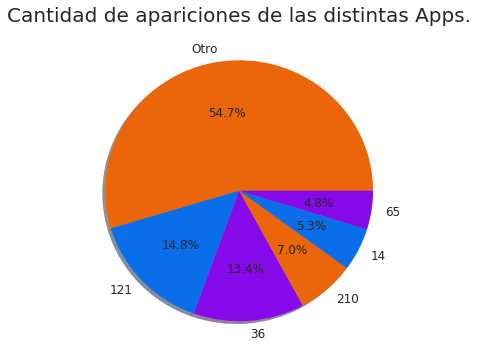

In [139]:
'''
Grafico pie de las apps.
'''
g = topApp.plot(kind='pie',autopct='%1.1f%%',figsize=(6,6),shadow=True,fontsize=12,colors=[(0.921, 0.396, 0.039),(0.039, 0.431, 0.921),(0.529, 0.039, 0.921)])
g.set_title("Cantidad de apariciones de las distintas Apps.",fontsize=20)
g.set_ylabel("")

Entre estas dos aplicaciones abarcan casi el 50% de las apariciones de aplicaciones.

## Que pasa respecto a los dias y horas?

In [140]:
'''
Separo la fecha de creacion en dia mes y anio
'''
installs['anio'] = installs['created'].apply(lambda x: x.year)
installs['mes'] = installs['created'].apply(lambda x: x.month)
installs['dia'] = installs['created'].apply(lambda x: x.day)
installs['hora'] = installs['created'].apply(lambda x: x.hour)
installs['minuto'] = installs['created'].apply(lambda x: x.minute)

installs['diaDeLaSemana'] = installs['created'].apply(lambda x: x.dayofweek)
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,...,trans_id,ip_address,device_language,TopApp/Otro,anio,mes,dia,hora,minuto,diaDeLaSemana
0,2019-04-24 06:23:29.495,1,1494519392962156891,4716708407362582887,NaN,False,True,6287817205707153877,-1.00,0.00,...,NaN,4243443387795468703,0.00,Otro,2019,4,24,6,23,2
1,2019-04-24 02:06:01.032,1,1494519392962156891,7143568733100935872,NaN,False,False,6287817205707153877,-1.00,1.00,...,NaN,4724288679627032761,0.00,Otro,2019,4,24,2,6,2
2,2019-04-20 10:15:36.274,1,1494519392962156891,5230323462636548010,NaN,False,True,6287817205707153877,-1.00,2.00,...,NaN,8291809486355890410,1.00,Otro,2019,4,20,10,15,5
3,2019-04-20 21:56:47.151,1,1494519392962156891,5097163995161606833,NaN,False,True,6287817205707153877,-1.00,3.00,...,NaN,4006811922873399949,0.00,Otro,2019,4,20,21,56,5
4,2019-04-20 22:40:41.239,1,1494519392962156891,6328027616411983332,NaN,False,False,6287817205707153877,-1.00,4.00,...,NaN,3386455054590810771,0.00,Otro,2019,4,20,22,40,5


In [69]:
installs['anio'].value_counts()

2019    481511
Name: anio, dtype: int64

In [70]:
installs['mes'].value_counts()

4    481511
Name: mes, dtype: int64

No parece haber una variedad significativa como para analizar las diferencias entre los valores. Los quito del df.

In [71]:
installs['dia'].value_counts()

18    56764
26    56418
23    53841
22    53510
21    53266
19    52314
25    51953
20    51783
24    51662
Name: dia, dtype: int64

In [141]:
'''
Quedo solo con dia, hora, minutos y dia de la semana (respecto al tiempo).
'''
installs = installs.drop(['anio','mes'], axis=1)

In [305]:
installs['aparicion'] = 1
for_heatmap = installs.pivot_table(index='dia', columns='hora', values='aparicion', aggfunc='sum')

Text(50.7222,0.5,'Dia')

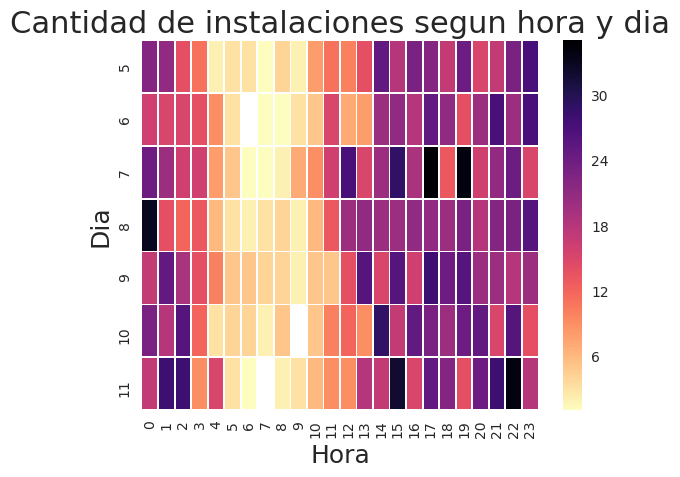

In [306]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="magma_r") # annot=True
g.set_title("Cantidad de instalaciones segun hora y dia", fontsize=22)
g.set_xlabel("Hora",fontsize=18)
g.set_ylabel("Dia", fontsize=18)

Podemos ver una disminucion de instalaciones entre las 3hs. y las 10hs.

In [307]:
installsPorDiaDeSemana = installs.groupby('diaDeLaSemana')['appGeneralizado'].value_counts().to_frame()
installsPorDiaDeSemana.columns = ['cantidad']
installsPorDiaDeSemana = installsPorDiaDeSemana.unstack()
installsPorDiaDeSemana

cantidad          
appGeneralizado        7    9 Otro
diaDeLaSemana                     
0                     97   74  206
1                    114   60  163
2                    102   82  141
3                    122  100  171
4                    108   85  173
5                     97   53  218
6                     90   54  207

Text(0.5,0,'Dia de la semana')

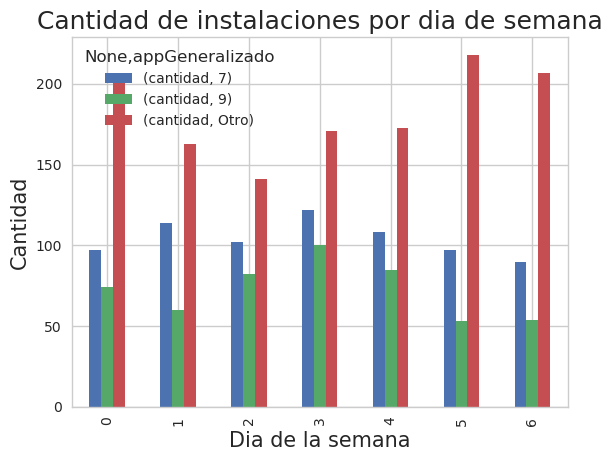

In [308]:
'''
Grafico de barras de instalacion por dia de semana.
'''
g = installsPorDiaDeSemana.plot.bar()
g.set_title("Cantidad de instalaciones por dia de semana", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Dia de la semana", fontsize=15)

Podemos ver que e su mayoria, las aplicacion 7 es instalada con mas frecuencia los dias martes y jueves, la aplicacion 9 los dias miercoles, jueves y viernes, y otra aplicaciones los sabados, domingos y lunes.
Por otro lado, solo contamos con la informacion de una semana, por lo que no podemos asegurar que este sea un comportamiento general de las instalaciones.
Tambien podria verse como patron como las dos aplicaciones con mas instalaciones aumentan su numero de las mismas a medida que nos acercamos a la mitad e la semana, para luego decrementar. Lo contrario sucede con las aplicaiones con menos instalaciones.

In [309]:
installs = installs.set_index('created')
installs = installs.sort_index()
installs.head()

,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,...,wifi,trans_id,ip_address,device_language,appGeneralizado,dia,hora,minuto,diaDeLaSemana,aparicion
created,,,,,,,,,,,,,,,,,,,,,
2019-03-05 00:00:38.219,5,2,5924583283197158397,nan,False,True,2,-1.00,383.00,adjust.com,...,NaN,NaN,3229461773198195808,1.00,Otro,5,0,0,1,1
2019-03-05 00:05:35.234,16,1,1740562126672148647,nan,False,False,1,12.00,143.00,http-kit/2.0,...,False,NaN,5663271682545770209,4.00,Otro,5,0,5,1,1
2019-03-05 00:07:25.431,16,1,760677655438420566,nan,False,False,1,18.00,263.00,http-kit/2.0,...,True,NaN,7488499899710199132,28.00,Otro,5,0,7,1,1
2019-03-05 00:07:38.572,8,2,5006759053482448963,nan,False,False,2,-1.00,77.00,adjust.com,...,NaN,NaN,5391189184595770642,1.00,Otro,5,0,7,1,1
2019-03-05 00:10:36.708,7,1,3318538943125451633,nan,False,False,2,-1.00,27.00,adjust.com,...,NaN,NaN,8558502523264989966,1.00,7,5,0,10,1,1


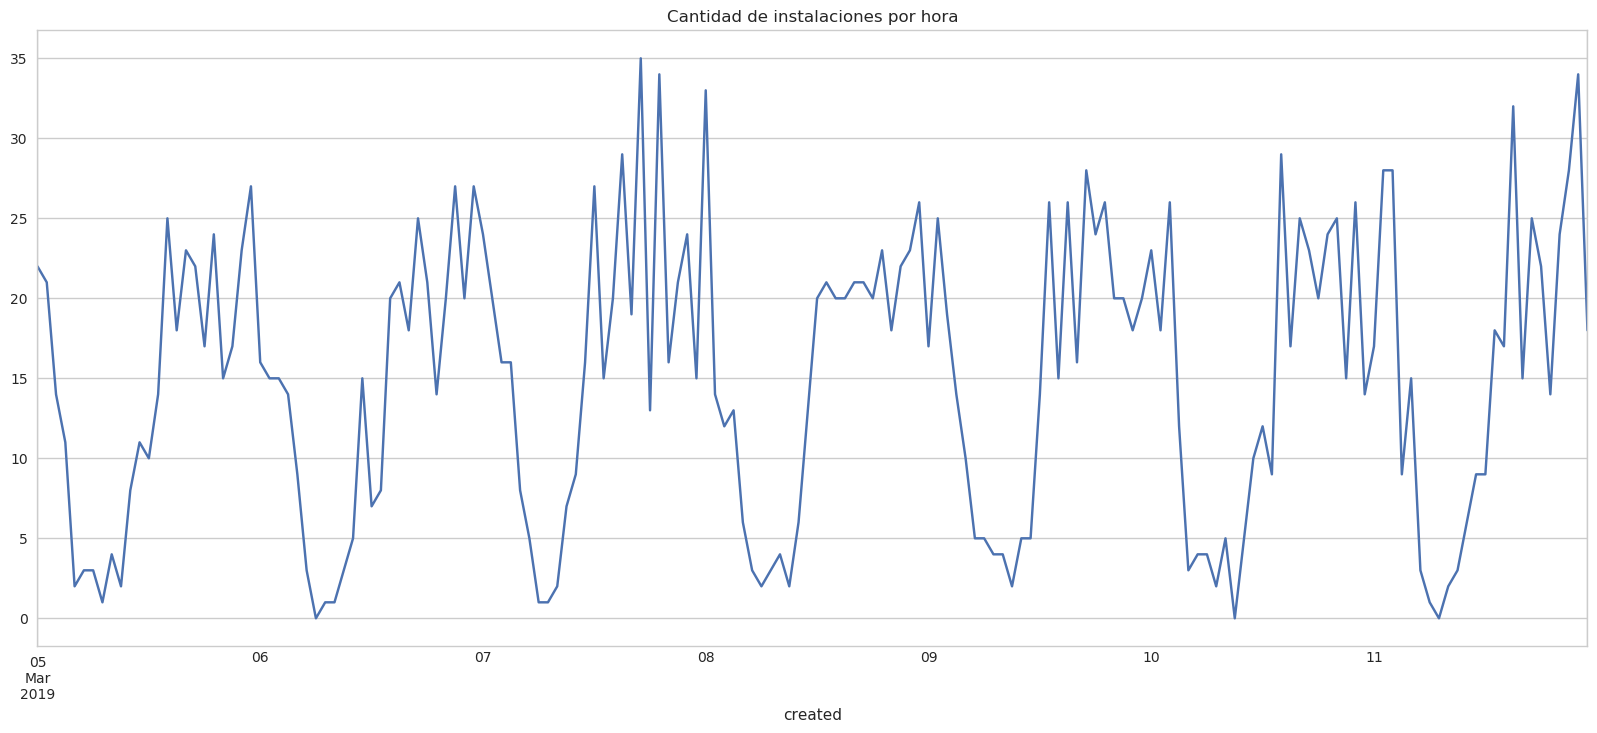

In [310]:
hourly_installs = installs.resample('H').size()
hourly_installs.plot(kind='line', figsize=(20, 8), title='Cantidad de instalaciones por hora', grid=True)

## Hay un ref_type que aparezca mucho mas que otro?

In [311]:
aparicionesRefType = installs['ref_type'].value_counts()
aparicionesRefType

1    1540
2     977
Name: ref_type, dtype: int64

Text(0,0.5,'Ref_Type')

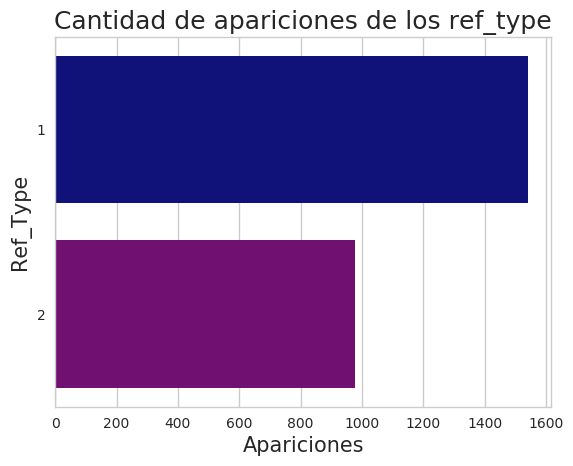

In [312]:
'''
Grafico de barras de apariciones de los ref_type.
'''

g = sns.barplot(x=aparicionesRefType.values, y=aparicionesRefType.index, orient='h',palette=['darkblue','purple'])
g.set_title("Cantidad de apariciones de los ref_type", fontsize=18)
g.set_xlabel("Apariciones", fontsize=15)
g.set_ylabel("Ref_Type", fontsize=15)

Las apariciones de 1 son casi del doble de las de 2.

Text(0,0.5,'Cantidad')

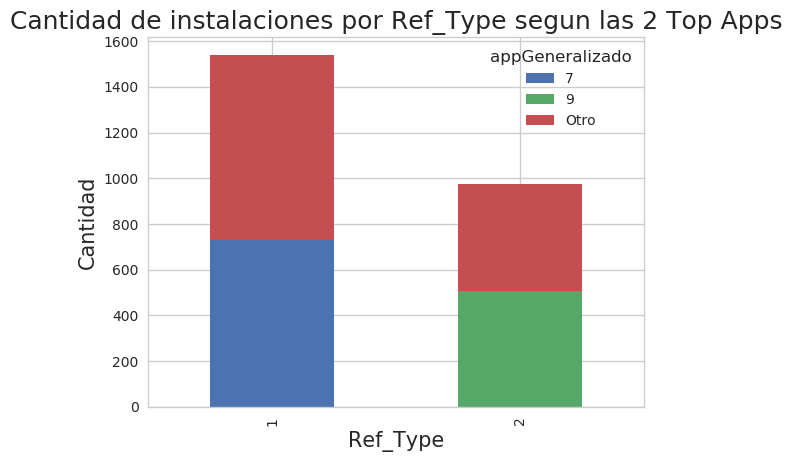

In [313]:
g = installs.groupby(['ref_type', 'appGeneralizado'])['ref_type'].count().unstack('appGeneralizado').fillna(0) 
g = g.plot(kind='bar', stacked=True)
g.set_title("Cantidad de instalaciones por Ref_Type segun las 2 Top Apps", fontsize=18)
g.set_xlabel("Ref_Type", fontsize=15)
g.set_ylabel("Cantidad", fontsize=15)

Podemos ver algo interesante. Parece ser que la aplicaion 9 es instalada casi por completo (si es que no es por completo) por ref_types de tipo 2, mientras que la aplicacion 7 es instalada a traves de 1.
Por otro lado, puede que la reparticion de estas dos aplicaciones entre ambos ref_types sea tan marcada debido a que son compatibles con solo uno de los tipos de dispositivo.
Tambien podria darse esto por la complementacion a los respectivos dispositivos, contando uno con una caracteristica que el otro no posee y viseversa.

In [142]:
top10apps = list(installs['application_id'].value_counts().head(10).to_frame().reset_index()['index'])

In [143]:
def top10Apps(app):
    if app in top10apps:
        return app
    return 'Otro'

In [144]:
installs['top10apps'] = installs['application_id'].apply(top10Apps)
topApp = installs['top10apps'].value_counts()

Text(0,0.5,'Cantidad')

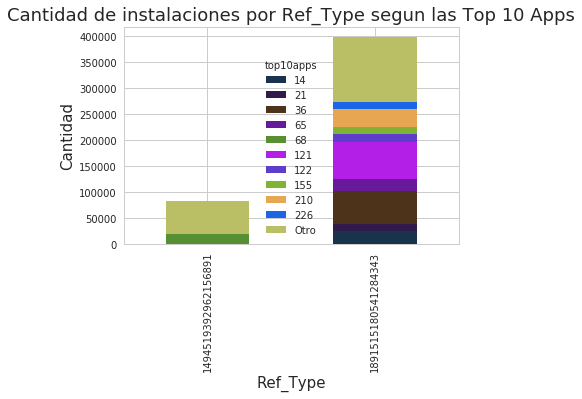

In [145]:
my_colors = [(0.1,0.2,0.3), (0.2, 0.1, 0.3), (0.3, 0.2, 0.1), (0.4, 0.1, 0.6), (0.34, 0.56, 0.2), (0.7, 0.12, 0.90), (0.36, 0.24, 0.8), (0.5, 0.7, 0.2), (0.9, 0.65, 0.32), (0.11, 0.4, 0.9), (0.73, 0.75, 0.4)]

g = installs.groupby(['ref_type', 'top10apps'])['ref_type'].count().unstack('top10apps').fillna(0) 
g = g.plot(kind='bar', stacked=True, color=my_colors)
g.set_title("Cantidad de instalaciones por Ref_Type segun las Top 10 Apps", fontsize=18)
g.set_xlabel("Ref_Type", fontsize=15)
g.set_ylabel("Cantidad", fontsize=15)

Aca vemos que en ambos ref_type hay aplicaciones distitas. Puede ser porque una misma app tiene codigo diferente por cada ref_type; porque cierta app esta disponible solo en un tipo de ref_type; o porque complementan distintas cosas de los dispocitivos (o aparecen mas propagandas en un tipo de ref_type mas que en otro).

In [318]:
ref_typePorDiaDeSemana = installs.groupby('diaDeLaSemana')['ref_type'].value_counts().to_frame()
ref_typePorDiaDeSemana.columns = ['cantidad']
ref_typePorDiaDeSemana = ref_typePorDiaDeSemana.unstack()
ref_typePorDiaDeSemana

cantidad     
ref_type             1    2
diaDeLaSemana              
0                  246  131
1                  207  130
2                  187  138
3                  229  164
4                  224  142
5                  228  140
6                  219  132

Text(0.5,0,'Dia de la semana')

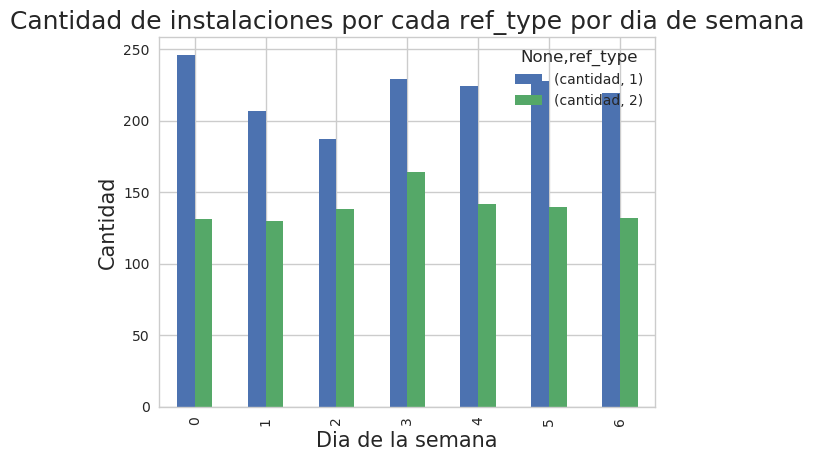

In [319]:
'''
Grafico de barras de instalacion por dia de semana.
'''
g = ref_typePorDiaDeSemana.plot.bar()
g.set_title("Cantidad de instalaciones por cada ref_type por dia de semana", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Dia de la semana", fontsize=15)

## Cual es el margen de instalaciones implicitas?

In [320]:
implicitas = installs['implicit'].value_counts().to_frame().reset_index()
implicitas['index'] = implicitas['index'].apply(lambda x: 'No implicita' if not x else 'Implicita')
implicitas = implicitas.set_index(['index'])
implicitas

,implicit
index,
No implicita,1878
Implicita,639


Text(0,0.5,'Es implicita?')

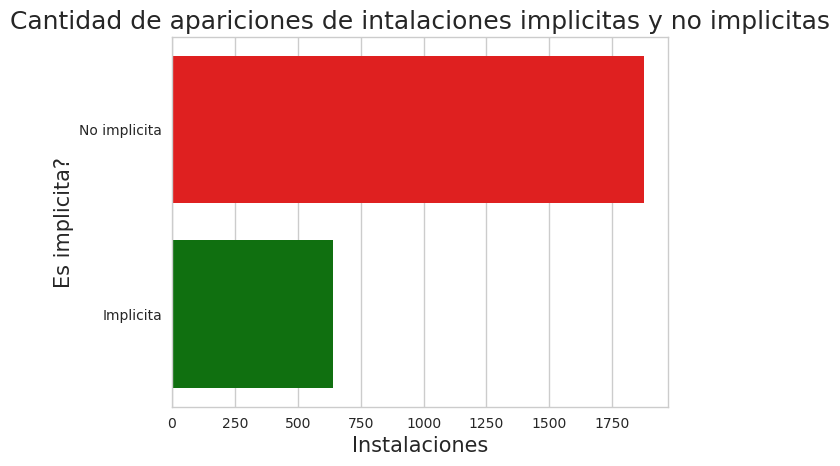

In [321]:
'''
Grafico de barras de instalaciones implicitas y no implicitas.
'''

g = sns.barplot(x=implicitas['implicit'].values, y=implicitas['implicit'].index, orient='h',palette=['red','green'])
g.set_title("Cantidad de apariciones de intalaciones implicitas y no implicitas", fontsize=18)
g.set_xlabel("Instalaciones", fontsize=15)
g.set_ylabel("Es implicita?", fontsize=15)

Text(0,0.5,'Cantidad')

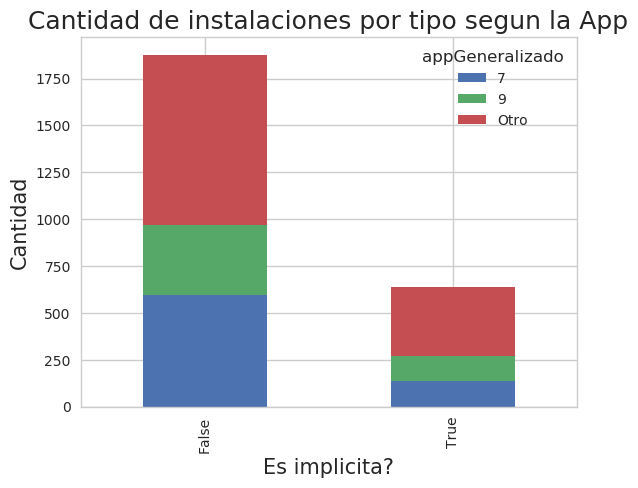

In [322]:
g = installs.groupby(['implicit', 'appGeneralizado'])['implicit'].count().unstack('appGeneralizado').fillna(0) 
g = g.plot(kind='bar', stacked=True)
g.set_title("Cantidad de instalaciones por tipo segun la App", fontsize=18)
g.set_xlabel("Es implicita?", fontsize=15)
g.set_ylabel("Cantidad", fontsize=15)

Si bien las instalaciones de tipo no implicito abarcan la gran mayoria de las instalaciones, la aplicacion 7 se ve proporcionalmente mas intalada de modo no implicito. Mientras, la aplicacion 9 cuenta con un mayor porcentage de instalaciones en las de tipo implicitas.

## Paises?

In [78]:
paises = installs['device_countrycode'].value_counts()
paises

6287817205707153877    481511
Name: device_countrycode, dtype: int64

Text(0,0.5,'Pais')

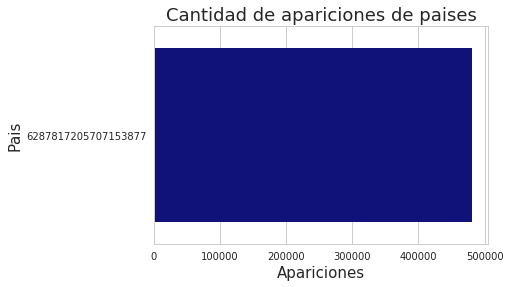

In [79]:
'''
Grafico de barras de apariciones de paises.
'''

g = sns.barplot(x=paises.values, y=paises.index, orient='h',palette=['darkblue','darkorange'])
g.set_title("Cantidad de apariciones de paises", fontsize=18)
g.set_xlabel("Apariciones", fontsize=15)
g.set_ylabel("Pais", fontsize=15)

Ambos paises estan muy parejos.

Text(0,0.5,'Cantidad')

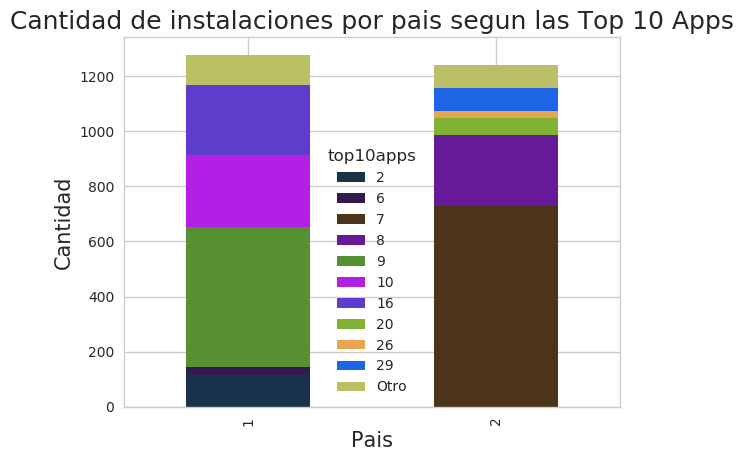

In [325]:
my_colors = [(0.1,0.2,0.3), (0.2, 0.1, 0.3), (0.3, 0.2, 0.1), (0.4, 0.1, 0.6), (0.34, 0.56, 0.2), (0.7, 0.12, 0.90), (0.36, 0.24, 0.8), (0.5, 0.7, 0.2), (0.9, 0.65, 0.32), (0.11, 0.4, 0.9), (0.73, 0.75, 0.4)]

g = installs.groupby(['device_countrycode', 'top10apps'])['device_countrycode'].count().unstack('top10apps').fillna(0) 
g = g.plot(kind='bar', stacked=True, color=my_colors)
g.set_title("Cantidad de instalaciones por pais segun las Top 10 Apps", fontsize=18)
g.set_xlabel("Pais", fontsize=15)
g.set_ylabel("Cantidad", fontsize=15)

Vemos algo parecido a lo que pasaba con las instalaciones segun ref_type: cada pais instla aplicaciones distintas. Puede darse tanto porque en un pais se publicitan ciertas apps que en el otro no, o porque no tienen las mismas necesidades respecto a apps.

## Marca de dispositivo

In [82]:
marcas = installs.loc[installs['device_brand'] != -1]['device_brand'].value_counts().head(50)
marcas_log= np.log(marcas+1)
marcas_log

  6.00                  11.33
  1.00                  10.97
 11.00                  10.77
  5.00                   9.61
  4.00                   9.18
 12.00                   9.01
  2.00                   8.69
 10.00                   8.68
132.00                   8.63
  7.00                   8.27
 14.00                   8.24
  8.00                   7.84
 15.00                   7.83
 61.00                   7.36
 22.00                   7.23
 29.00                   7.22
 19.00                   7.14
 18.00                   7.01
 23.00                   6.85
 43.00                   6.69
 20.00                   6.55
 44.00                   6.53
 16.00                   6.41
119.00                   6.21
 31.00                   6.14
139.00                   6.02
 56.00                   6.01
 54.00                   5.88
 60.00                   5.86
 57.00                   5.71
 21.00                   5.70
 24.00                   5.57
 92.00                   5.54
 85.00    

In [146]:
top50marcas = list(installs['device_brand'].value_counts().head(50).to_frame().reset_index()['index'])

In [147]:
def top50Marcas(app):
    if app in top50marcas:
        return app
    return 'Otro'

In [148]:
installs['top50marcas'] = installs['device_brand'].apply(top50Marcas)
top50marcas = installs['top50marcas'].value_counts()

Text(0,0.5,'Marca')

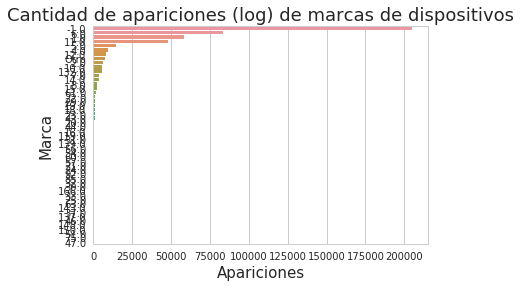

In [149]:
'''
Grafico de barras de apariciones de marcas de dispositivos.
'''

g = sns.barplot(x=top50marcas.values, y=top50marcas.index, orient='h')
g.set_title("Cantidad de apariciones (log) de marcas de dispositivos", fontsize=18)
g.set_xlabel("Apariciones", fontsize=15)
g.set_ylabel("Marca", fontsize=15)

Text(0,0.5,'Marca')

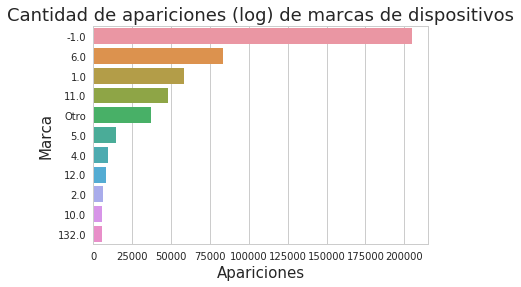

In [150]:
top10marcas = list(installs['device_brand'].value_counts().head(10).to_frame().reset_index()['index'])

def top10Marcas(app):
    if app in top10marcas:
        return app
    return 'Otro'

installs['top10marcas'] = installs['device_brand'].apply(top10Marcas)
top10marcas = installs['top10marcas'].value_counts()

'''
Grafico de barras de apariciones de marcas de dispositivos.
'''

g = sns.barplot(x=top10marcas.values, y=top10marcas.index, orient='h')
g.set_title("Cantidad de apariciones (log) de marcas de dispositivos", fontsize=18)
g.set_xlabel("Apariciones", fontsize=15)
g.set_ylabel("Marca", fontsize=15)

Text(0,0.5,'Marca')

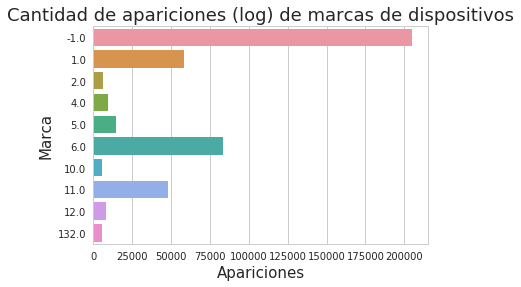

In [151]:
top10marcas = list(installs.loc[(installs['device_brand'] != -1)]['device_brand'].value_counts().head(10).to_frame().reset_index()['index'])

def top10Marcas(app):
    if app in top10marcas:
        return app
    return 'Otro'

installs['top10marcasSinNan'] = installs['device_brand'].apply(top10Marcas)
top10marcas = installs['top10marcas'].loc[(installs['top10marcas'] != 'Otro')].value_counts()

'''
Grafico de barras de apariciones de marcas de dispositivos.
'''

g = sns.barplot(x=top10marcas.values, y=top10marcas.index, orient='h')
g.set_title("Cantidad de apariciones (log) de marcas de dispositivos", fontsize=18)
g.set_xlabel("Apariciones", fontsize=15)
g.set_ylabel("Marca", fontsize=15)

In [328]:
modeloYMarca = installs.loc[installs['device_brand'] != -1].groupby(['device_brand','device_model'])['application_id'].count().to_frame()
modeloYMarca = modeloYMarca.loc[modeloYMarca['application_id']>10].reset_index()[['device_brand','application_id']]
modeloYMarca

,device_brand,application_id
0,0.00,13
1,0.00,16
2,0.00,11
3,0.00,22
4,0.00,30
5,0.00,17
6,3.00,15
7,3.00,11


In [329]:
'''
Instalaciones en dispositivos de marca 308305860557778688.00 segun modelos con mas de 10 instalaciones.
'''
modelo1 = installs.loc[installs['device_brand'] == 0.00].groupby('device_model')['application_id'].count().to_frame()
modelo1 = modelo1.loc[modelo1['application_id'] > 10]#.unstack('device_model')
modelo1

,application_id
device_model,
6.00,13
27.00,16
34.00,11
37.00,22
55.00,30
56.00,17


Text(0,0.5,'Cantidad')

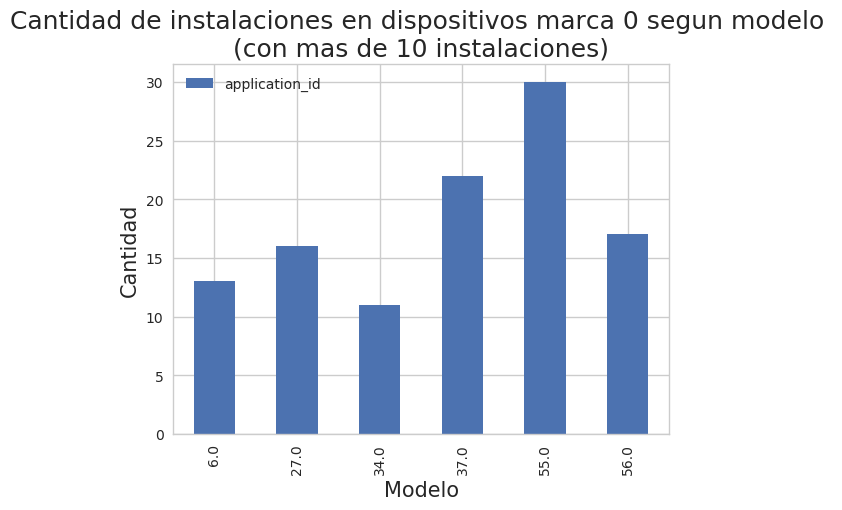

In [330]:
'''
Grafico de barras de instalacion por dia de semana.
'''
g = modelo1
g = g.plot(kind='bar', stacked=True)
g.set_title("Cantidad de instalaciones en dispositivos marca 0 segun modelo \n(con mas de 10 instalaciones)", fontsize=18)
g.set_xlabel("Modelo", fontsize=15)
g.set_ylabel("Cantidad", fontsize=15)


In [331]:
'''
Instalaciones en dispositivos de marca 3 segun modelos con mas de 10 instalaciones.
'''
modelo2 = installs.loc[installs['device_brand'] == 3].groupby('device_model')['application_id'].count().to_frame()
modelo2 = modelo2.loc[modelo2['application_id'] > 10]
modelo2

,application_id
device_model,
24.00,15
45.00,11


Text(0,0.5,'Cantidad')

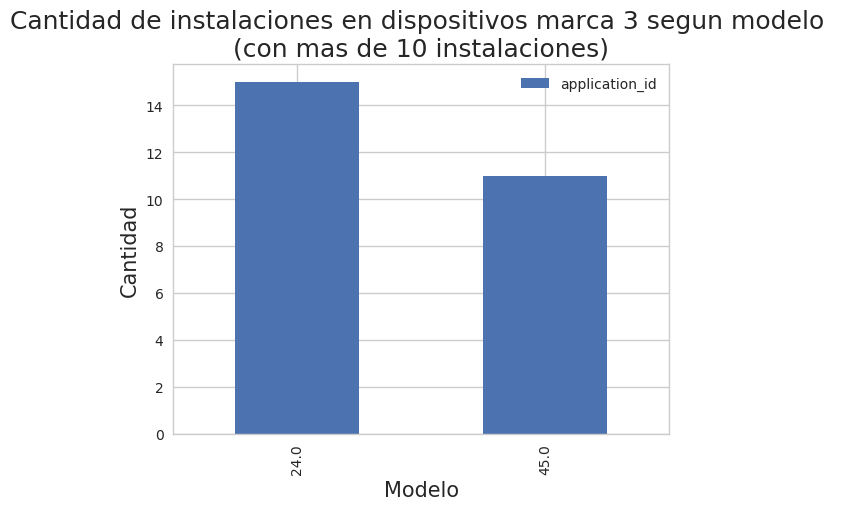

In [332]:
'''
Grafico de barras de instalacion por dia de semana.
'''
g = modelo2
g = g.plot(kind='bar', stacked=True)
g.set_title("Cantidad de instalaciones en dispositivos marca 3 segun modelo \n(con mas de 10 instalaciones)", fontsize=18)
g.set_xlabel("Modelo", fontsize=15)
g.set_ylabel("Cantidad", fontsize=15)


## Agente usado para la instalacion

In [169]:
instaladores = installs['session_user_agent'].value_counts().head()
instaladores

 2       335311
 0        75354
 1095     15193
-1        14839
 8         9204
Name: session_user_agent, dtype: int64

Text(0,0.5,'Instalador')

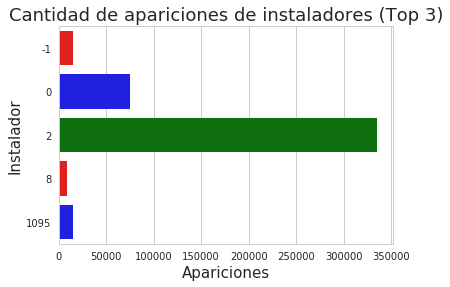

In [170]:
'''
Grafico de barras de apariciones de instaladores.
'''

g = sns.barplot(x=instaladores.values, y=instaladores.index, orient='h',palette=['red','blue','green'])
g.set_title("Cantidad de apariciones de instaladores (Top 3)", fontsize=18)
g.set_xlabel("Apariciones", fontsize=15)
g.set_ylabel("Instalador", fontsize=15)

## User agent

In [152]:
installs['agentes'] = installs['user_agent'].dropna().apply(lambda x: str(x).split('/')[0])
agentesUsuario = installs['agentes'].value_counts()
agentesUsuario

Dalvik                                                                                                  255175
Grability                                                                                                18762
Mozilla                                                                                                  17952
Wish                                                                                                      5958
TikTok                                                                                                    5772
SinDelantal                                                                                               4832
Gardenscapes                                                                                              4705
Zaful                                                                                                     2707
trivago                                                                                                   2330
M

Text(0,0.5,'Marca')

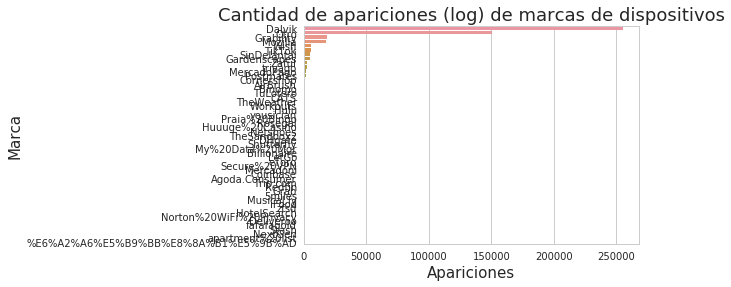

In [153]:
top50agentes = agentesUsuario.head(50)

def top50Agentes(app):
    if app in top50agentes:
        return app
    return 'Otro'

installs['top50agentes'] = installs['agentes'].apply(top50Agentes)
top50agentes = installs['top50agentes'].value_counts()

'''
Grafico de barras de apariciones de marcas de dispositivos.
'''

g = sns.barplot(x=top50agentes.values, y=top50agentes.index, orient='h')
g.set_title("Cantidad de apariciones (log) de marcas de dispositivos", fontsize=18)
g.set_xlabel("Apariciones", fontsize=15)
g.set_ylabel("Marca", fontsize=15)

Text(0,0.5,'Marca')

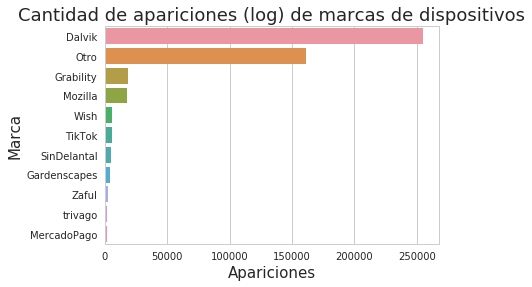

In [154]:
top10agentes = agentesUsuario.head(10)

def top10Agentes(app):
    if app in top10agentes:
        return app
    return 'Otro'

installs['top10agentes'] = installs['agentes'].apply(top10Agentes)
top10agentes = installs['top10agentes'].value_counts()

'''
Grafico de barras de apariciones de marcas de dispositivos.
'''

g = sns.barplot(x=top10agentes.values, y=top10agentes.index, orient='h')
g.set_title("Cantidad de apariciones (log) de marcas de dispositivos", fontsize=18)
g.set_xlabel("Apariciones", fontsize=15)
g.set_ylabel("Marca", fontsize=15)

Text(0,0.5,'Agente de Usuario')

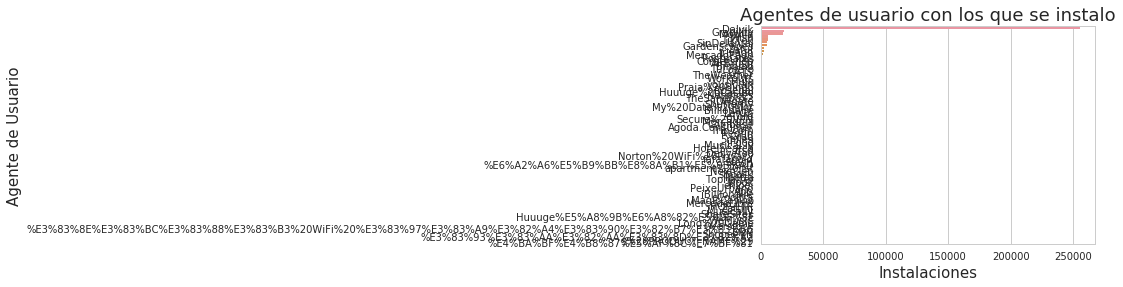

In [155]:
'''
Grafico de barras de apariciones de agentes de usuario.
'''

g = sns.barplot(x=agentesUsuario.values, y=agentesUsuario.index, orient='h')
g.set_title("Agentes de usuario con los que se instalo", fontsize=18)
g.set_xlabel("Instalaciones", fontsize=15)
g.set_ylabel("Agente de Usuario", fontsize=15)

## Tipo de instalacion

In [116]:
installs['kind'].value_counts()

Open                            37257
af_app_opened                   27845
app_open                         8635
app open                         7134
Sign In                          3822
list view                        3665
OPEN                             3271
login_success                    1627
pax_app_open                     1570
product view                      800
EVENT_OPEN_APP                    679
product_preview                   646
account_summary_first_step        505
deeplink_open                     388
Pre_checkout                      365
adjust_uninstall                  338
reattribution                     332
Add_to_cart                       292
af_view_product                   228
sessionbegin                      198
af app open                       154
af_app_opend                      154
1st_ride                          141
af_content_view                   137
MobileSignup                      133
install                           122
Session Begi

In [156]:
def reducirTipos(tipo):
    tipo = str(tipo).lower()
    palabrasDelTipo1 = tipo.split('_')
    palabrasDelTipo2 = tipo.split(' ')
    if ('open' in palabrasDelTipo1) or ('opened' in palabrasDelTipo1) or ('open' in palabrasDelTipo2) or ('opened' in palabrasDelTipo2):
        return 'open'
    if ('view' in palabrasDelTipo1) or ('viewed' in palabrasDelTipo1) or ('view' in palabrasDelTipo2) or ('viewed' in palabrasDelTipo2):
        return 'view'
    return str(tipo)

In [157]:
installs['kindReducido'] = installs['kind'].dropna().apply(reducirTipos)

In [158]:
tiposDeInstalacion = installs['kindReducido'].value_counts()
tiposDeInstalacion

open                          87255
view                           4985
sign in                        3822
login_success                  1627
product_preview                 646
account_summary_first_step      505
pre_checkout                    365
adjust_uninstall                338
reattribution                   332
add_to_cart                     292
sessionbegin                    225
install                         203
af_app_opend                    154
1st_ride                        141
mobilesignup                    133
session begin                   119
app first start                 115
registration                    113
add_payment                     110
signed in                        98
startsessionplayback             97
took_ride                        96
registration_complete            90
payment method add               86
app launch                       83
added_personal_info              61
app_launch                       57
login                       

Text(0,0.5,'Marca')

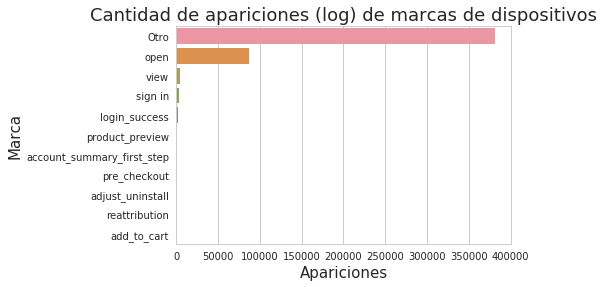

In [159]:
top10tipo = tiposDeInstalacion.head(10)

def top10Tipo(app):
    if app in top10tipo:
        return app
    return 'Otro'

installs['top10tipo'] = installs['kindReducido'].apply(top10Tipo)
top10tipo = installs['top10tipo'].value_counts()

'''
Grafico de barras de apariciones de marcas de dispositivos.
'''

g = sns.barplot(x=top10tipo.values, y=top10tipo.index, orient='h')
g.set_title("Cantidad de apariciones (log) de marcas de dispositivos", fontsize=18)
g.set_xlabel("Apariciones", fontsize=15)
g.set_ylabel("Marca", fontsize=15)

Text(0,0.5,'Tipo de instalacion')

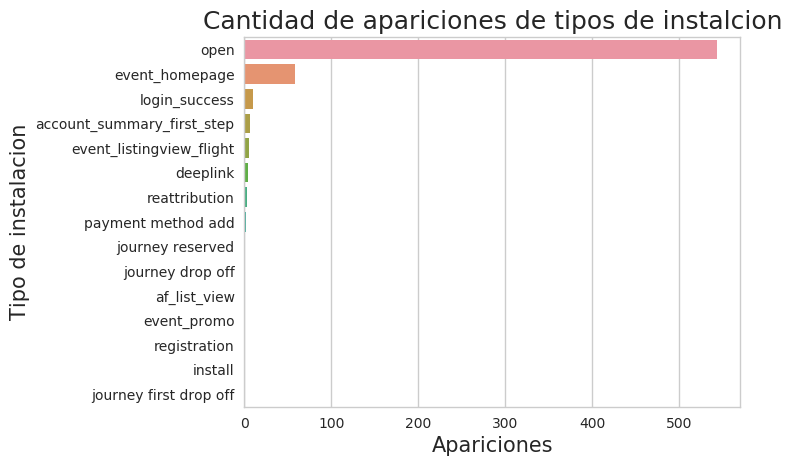

In [341]:
'''
Grafico de barras de apariciones de tipos de instalacion.
'''

g = sns.barplot(x=tiposDeInstalacion.values, y=tiposDeInstalacion.index, orient='h')
g.set_title("Cantidad de apariciones de tipos de instalcion", fontsize=18)
g.set_xlabel("Apariciones", fontsize=15)
g.set_ylabel("Tipo de instalacion", fontsize=15)

## Wifi

In [127]:
installs['wifiLegible'] = installs['wifi'].dropna().apply(lambda x: 'Sin wifi' if not x else 'Con wifi')
wifi = installs['wifiLegible'].value_counts()
wifi

Con wifi    235130
Sin wifi     59699
Name: wifiLegible, dtype: int64

Text(0,0.5,'')

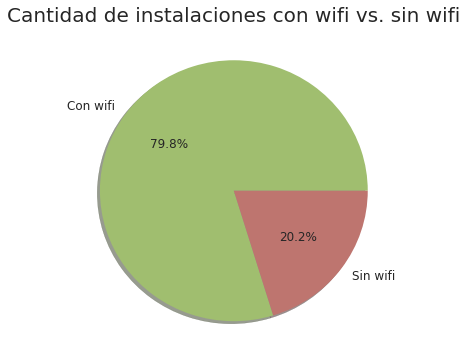

In [128]:
'''
Grafico de instalaciones con wifi vs sin wifi.
'''

g = wifi.plot(kind='pie',autopct='%1.1f%%',figsize=(6,6),shadow=True,fontsize=12,colors=[(0.627, 0.745, 0.435),(0.745, 0.458, 0.435)])
g.set_title("Cantidad de instalaciones con wifi vs. sin wifi",fontsize=20)
g.set_ylabel("")

## Device Language

In [161]:
topLeng = installs.loc[installs['device_language'] != -1]['device_language'].value_counts().head(10)
topLeng

 34.00    233012
  0.00    149638
  3.00     46449
 33.00      6041
  1.00      5222
  2.00      3867
129.00      2565
  8.00      1778
  4.00      1490
126.00       902
Name: device_language, dtype: int64

Text(0,0.5,'Marca')

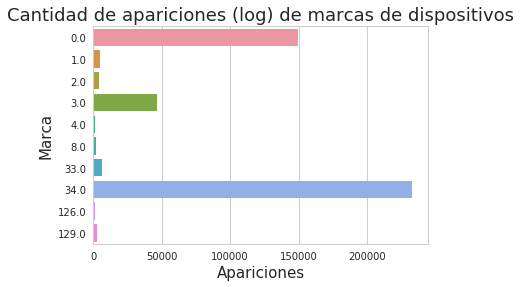

In [160]:
top10leng = topLeng

def top10Leng(app):
    if app in top10leng:
        return app
    return 'Otro'

installs['top10leng'] = installs['device_language'].apply(top10Leng)
top10tipo = installs['top10leng'].value_counts()

'''
Grafico de barras de apariciones de marcas de dispositivos.
'''

g = sns.barplot(x=top10leng.values, y=top10leng.index, orient='h')
g.set_title("Cantidad de apariciones (log) de marcas de dispositivos", fontsize=18)
g.set_xlabel("Apariciones", fontsize=15)
g.set_ylabel("Marca", fontsize=15)

Text(0,0.5,'Leng')

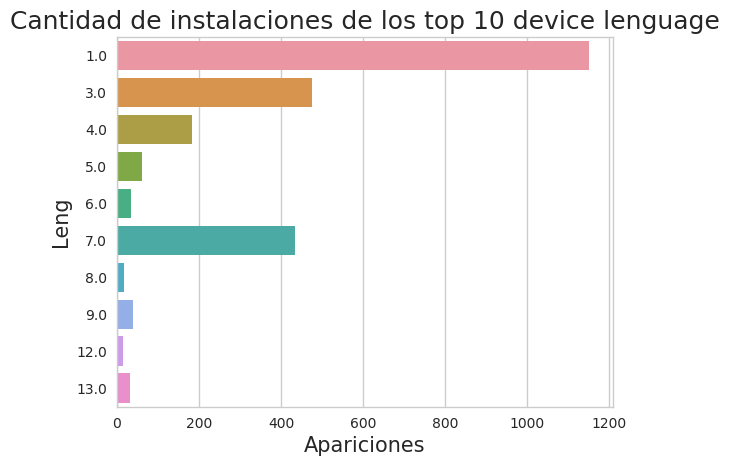

In [345]:
'''
Grafico de barras de apariciones de device lenguage.
'''

g = sns.barplot(x=topLeng.values, y=topLeng.index, orient='h')
g.set_title("Cantidad de instalaciones de los top 10 device lenguage", fontsize=18)
g.set_xlabel("Apariciones", fontsize=15)
g.set_ylabel("Leng", fontsize=15)

## Ref type por dia y hora

In [346]:
refType1 = installs.loc[installs['ref_type'] == 1]

Text(50.7222,0.5,'Dia')

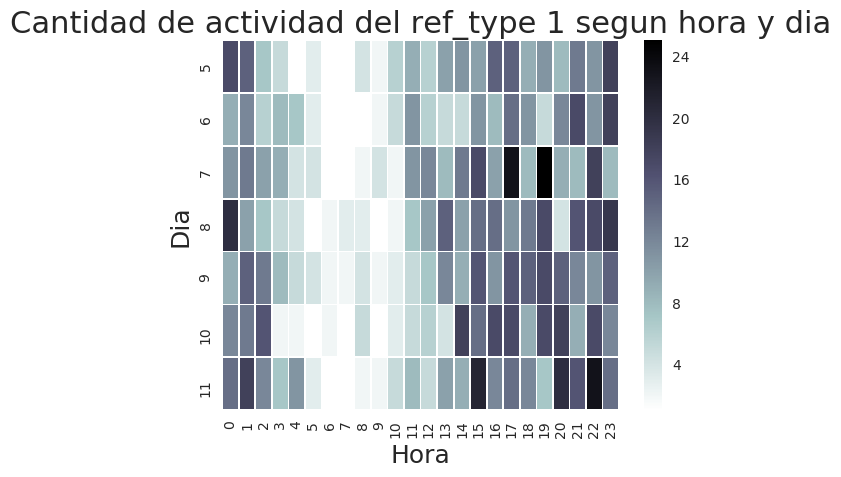

In [347]:
for_heatmap = refType1.pivot_table(index='dia', columns='hora', values='aparicion', aggfunc='sum')
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="bone_r") # annot=True
g.set_title("Cantidad de actividad del ref_type 1 segun hora y dia", fontsize=22)
g.set_xlabel("Hora",fontsize=18)
g.set_ylabel("Dia", fontsize=18)

In [348]:
refType2 = installs.loc[installs['ref_type'] == 2]

Text(50.7222,0.5,'Dia')

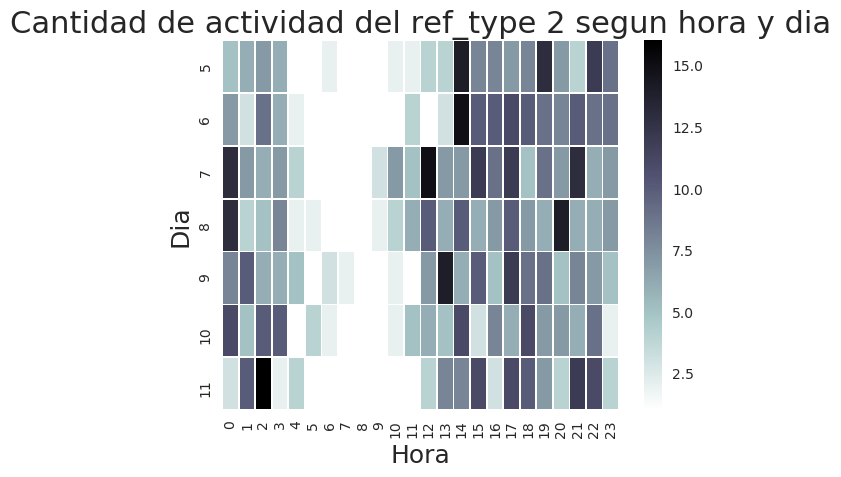

In [349]:
for_heatmap = refType2.pivot_table(index='dia', columns='hora', values='aparicion', aggfunc='sum')
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="bone_r") # annot=True
g.set_title("Cantidad de actividad del ref_type 2 segun hora y dia", fontsize=22)
g.set_xlabel("Hora",fontsize=18)
g.set_ylabel("Dia", fontsize=18)

# Dropeo lo que no sirve y paso a int

In [166]:
ref_type = list(installs['ref_type'].drop_duplicates())

def categorizarRef_type(x):
    return ref_type.index(x) if (x != -1) else x

installs['ref_type'] = installs['ref_type'].fillna(-1).apply(categorizarRef_type)

In [167]:
session_user_agent = list(installs['session_user_agent'].drop_duplicates())

def categorizarSession_user_agent(x):
    return session_user_agent.index(x) if (x != -1) else x

installs['session_user_agent'] = installs['session_user_agent'].fillna(-1).apply(categorizarSession_user_agent)

In [171]:
user_agent = list(installs['user_agent'].drop_duplicates())

def categorizarUser_agent(x):
    return user_agent.index(x) if (x != -1) else x

installs['user_agent'] = installs['user_agent'].fillna(-1).apply(categorizarUser_agent)

In [172]:
kind = list(installs['kind'].drop_duplicates())

def categorizarKind(x):
    return kind.index(x) if (x != -1) else x

installs['kind'] = installs['kind'].fillna(-1).apply(categorizarKind)

In [173]:
installs['wifi'] = installs['wifi'].fillna(False)

In [177]:
TopAppOtro = list(installs['TopApp/Otro'].drop_duplicates())

def categorizarTopAppOtro(x):
    return TopAppOtro.index(x) if (x != -1) else x

installs['TopApp/Otro'] = installs['TopApp/Otro'].fillna(-1).apply(categorizarTopAppOtro)

In [178]:
top10apps = list(installs['top10apps'].drop_duplicates())

def categorizartop10apps(x):
    return top10apps.index(x) if (x != -1) else x

installs['top10apps'] = installs['top10apps'].fillna(-1).apply(categorizartop10apps)

In [179]:
top50marcas = list(installs['top50marcas'].drop_duplicates())

def categorizartop50marcas(x):
    return top50marcas.index(x) if (x != -1) else x

installs['top50marcas'] = installs['top50marcas'].fillna(-1).apply(categorizartop50marcas)

In [180]:
top10marcas = list(installs['top10marcas'].drop_duplicates())

def categorizartop10marcas(x):
    return top10marcas.index(x) if (x != -1) else x

installs['top10marcas'] = installs['top10marcas'].fillna(-1).apply(categorizartop10marcas)

In [182]:
top10marcasSinNan = list(installs['top10marcasSinNan'].drop_duplicates())

def categorizartop10marcasSinNan(x):
    return top10marcasSinNan.index(x) if (x != -1) else x

installs['top10marcasSinNan'] = installs['top10marcasSinNan'].fillna(-1).apply(categorizartop10marcasSinNan)

In [183]:
agentes = list(installs['agentes'].drop_duplicates())

def categorizaragentes(x):
    return agentes.index(x) if (x != -1) else x

installs['agentes'] = installs['agentes'].fillna(-1).apply(categorizaragentes)

In [184]:
top50agentes = list(installs['top50agentes'].drop_duplicates())

def categorizartop50agentes(x):
    return top50agentes.index(x) if (x != -1) else x

installs['top50agentes'] = installs['top50agentes'].fillna(-1).apply(categorizartop50agentes)

In [185]:
top10agentes = list(installs['top10agentes'].drop_duplicates())

def categorizartop10agentes(x):
    return top10agentes.index(x) if (x != -1) else x

installs['top10agentes'] = installs['top10agentes'].fillna(-1).apply(categorizartop10agentes)

In [187]:
kindReducido = list(installs['kindReducido'].drop_duplicates())

def categorizarkindReducido(x):
    return kindReducido.index(x) if (x != -1) else x

installs['kindReducido'] = installs['kindReducido'].fillna(-1).apply(categorizarkindReducido)

In [188]:
top10tipo = list(installs['top10tipo'].drop_duplicates())

def categorizartop10tipo(x):
    return top10tipo.index(x) if (x != -1) else x

installs['top10tipo'] = installs['top10tipo'].fillna(-1).apply(categorizartop10tipo)

In [189]:
top10leng = list(installs['top10leng'].drop_duplicates())

def categorizartop10leng(x):
    return top10leng.index(x) if (x != -1) else x

installs['top10leng'] = installs['top10leng'].fillna(-1).apply(categorizartop10leng)

In [192]:
installs.drop(['created','click_hash','trans_id','event_uuid'],axis =1, inplace = True )
installs = installs.dropna()

ValueError: labels ['created' 'click_hash' 'trans_id' 'event_uuid'] not contained in axis

# Como quedan las columnas

In [193]:
installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481511 entries, 0 to 481510
Data columns (total 29 columns):
application_id        481511 non-null int64
ref_type              481511 non-null int64
ref_hash              481511 non-null int64
attributed            481511 non-null bool
implicit              481511 non-null bool
device_countrycode    481511 non-null int64
device_brand          481511 non-null float64
device_model          481511 non-null float64
session_user_agent    481511 non-null int64
user_agent            481511 non-null int64
kind                  481511 non-null int64
wifi                  481511 non-null bool
ip_address            481511 non-null int64
device_language       481511 non-null float64
TopApp/Otro           481511 non-null int64
dia                   481511 non-null int64
hora                  481511 non-null int64
minuto                481511 non-null int64
diaDeLaSemana         481511 non-null int64
top10apps             481511 non-null int64
top50m

In [195]:
installs.head()

,application_id,ref_type,ref_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,...,top10apps,top50marcas,top10marcas,top10marcasSinNan,agentes,top50agentes,top10agentes,kindReducido,top10tipo,top10leng
0,1,0,4716708407362582887,False,True,6287817205707153877,-1.00,0.00,0,-1,...,0,-1.00,-1.00,0,-1,0,0,0,0,0
1,1,0,7143568733100935872,False,False,6287817205707153877,-1.00,1.00,0,-1,...,0,-1.00,-1.00,0,-1,0,0,-1,1,0
2,1,0,5230323462636548010,False,True,6287817205707153877,-1.00,2.00,0,-1,...,0,-1.00,-1.00,0,-1,0,0,0,0,1
3,1,0,5097163995161606833,False,True,6287817205707153877,-1.00,3.00,0,-1,...,0,-1.00,-1.00,0,-1,0,0,0,0,0
4,1,0,6328027616411983332,False,False,6287817205707153877,-1.00,4.00,0,-1,...,0,-1.00,-1.00,0,-1,0,0,-1,1,0


# Lo guardo

In [194]:
installs.to_csv('TP 1er Cuatrimestre 2019/installsConFeatures.csv')